# Decision trees and random forest
## Preprocessing

In [2]:
#you first need to download the data from teams and put it in the same folder as this to be able to load the script
#here i load the libraries and set the theme to seaborn
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import datetime
import imblearn
import collections
sns.set_theme()

In [3]:
#here i read the csv file and save it in a dataframe
df= pd.read_csv('January_Schiphol_Time_Groups.csv')
df

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,Train_Delay,MaxNumberOfStops,weekday,day_of_week,Train_Departure_Planned_Time,Time_Group
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,0.0,10,4,Friday,64400,Morning_Rush_Hour
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,0.0,10,4,Friday,64800,Morning_Rush_Hour
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,0.0,10,4,Friday,70000,Morning_Rush_Hour
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,0.0,10,4,Friday,70200,Morning_Rush_Hour
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,0.0,10,4,Friday,70900,Morning_Rush_Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,0.0,13,6,Sunday,225300,Night
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,0.0,6,6,Sunday,231000,Night
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,0.0,6,6,Sunday,234000,Night
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,0.0,6,6,Sunday,234600,Night


In [4]:
#here i make dummies from the different station names so i can use it for the random forest and decision trees algerithms
StationDummies=pd.get_dummies(df['Station_Name'])
StationDummies

,'s-Hertogenbosch,Almelo,Almere Centrum,Amersfoort,Amersfoort Schothorst,Amsterdam Bijlmer ArenA,Amsterdam RAI,Amsterdam Zuid,Apeldoorn,Apeldoorn Osseveld,...,Schiphol Airport,Sittard,Twello,Utrecht Centraal,Utrecht Overvecht,Veenendaal-De Klomp,Weert,Wierden,Wolfheze,Zaltbommel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76311,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76313,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#i also do this for the days of the week
DayDummies=pd.get_dummies(df['day_of_week'])
DayDummies

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
76310,0,0,0,1,0,0,0
76311,0,0,0,1,0,0,0
76312,0,0,0,1,0,0,0
76313,0,0,0,1,0,0,0


In [6]:
#for the time groups 
TimeDummies=pd.get_dummies(df['Time_Group'])
TimeDummies

,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
76310,0,0,0,0,1
76311,0,0,0,0,1
76312,0,0,0,0,1
76313,0,0,0,0,1


In [7]:
# an also for the train types
TrainDummies=pd.get_dummies(df['Train_Type'])
TrainDummies

,Extra trein,Intercity,Sprinter
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
76310,0,1,0
76311,0,1,0
76312,0,1,0
76313,0,1,0


In [8]:
#then i add all those dataframes with the dummies to the dataset
FinalDF=pd.concat([df, StationDummies, DayDummies, TimeDummies, TrainDummies], axis=1)
FinalDF

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,...,Tuesday,Wednesday,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night,Extra trein,Intercity,Sprinter
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,...,0,0,0,0,0,1,0,0,1,0
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,...,0,0,0,0,0,1,0,0,1,0
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,...,0,0,0,0,0,1,0,0,1,0
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,...,0,0,0,0,0,1,0,0,1,0
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,...,0,0,0,0,0,0,1,0,1,0
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,...,0,0,0,0,0,0,1,0,1,0
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,...,0,0,0,0,0,0,1,0,1,0
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,...,0,0,0,0,0,0,1,0,1,0


In [9]:
# and then last but not least i add the group if there is a train delay 
FinalDF['DelayOrNot'] = np.where(FinalDF['Train_Delay']<=60, 0, 1).astype(int)
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76315 entries, 0 to 76314
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    76315 non-null  int64  
 1   Station_Code                  76315 non-null  object 
 2   Station_Name                  76315 non-null  object 
 3   Train_Number                  76315 non-null  int64  
 4   Train_Type                    76315 non-null  object 
 5   Train_Company                 76315 non-null  object 
 6   Train_Destination_Planned     76315 non-null  object 
 7   Train_Destination_Actual      76315 non-null  object 
 8   Train_Departure_Planned       76315 non-null  object 
 9   Train_Departure_Actual        76315 non-null  object 
 10  Train_Delay                   76315 non-null  float64
 11  MaxNumberOfStops              76315 non-null  int64  
 12  weekday                       76315 non-null  int64  
 13  d

## Decision trees part 1

In [10]:
#then i import the function to split train and test data, select the y and x features and split the data into test and train data
from sklearn.model_selection import train_test_split
#then i set the x and y axis and devide the data in train and test data.
X = FinalDF.iloc[:, [12, 16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]]
y = FinalDF['DelayOrNot']

In [11]:
#then i inport the counter and nearmiss functions so count the groups in the y and to undersampe the data
from collections import Counter
from imblearn.under_sampling import NearMiss
#here i try out version one of the near miss and count too see if it indeed undersampled the data
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, y)
print(Counter(y))
print(Counter(y_nm))

Counter({0: 53071, 1: 23244})
Counter({0: 23244, 1: 23244})


In [12]:
#here i split the downsampled data info train and test data
X_train, X_test, y_train, y_test = train_test_split(x_nm, y_nm, test_size=0.2, random_state = 42)

In [13]:
#here i look at the information from the new dataset
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76315 entries, 0 to 76314
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    76315 non-null  int64  
 1   Station_Code                  76315 non-null  object 
 2   Station_Name                  76315 non-null  object 
 3   Train_Number                  76315 non-null  int64  
 4   Train_Type                    76315 non-null  object 
 5   Train_Company                 76315 non-null  object 
 6   Train_Destination_Planned     76315 non-null  object 
 7   Train_Destination_Actual      76315 non-null  object 
 8   Train_Departure_Planned       76315 non-null  object 
 9   Train_Departure_Actual        76315 non-null  object 
 10  Train_Delay                   76315 non-null  float64
 11  MaxNumberOfStops              76315 non-null  int64  
 12  weekday                       76315 non-null  int64  
 13  d

In [14]:
# then i import tree, decisiontreeclassifier and gridsearch 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#here i do the gridsearch to get the best values for the parameters
parameters = {'criterion':('gini', 'entropy'), 'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
clf_GS = GridSearchCV(DecisionTreeClassifier(), parameters)
clf_GS.fit(x_nm, y_nm)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30]})

In [15]:
#here i print the outcomes from the gridsearch
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 2


[Text(0.5, 0.8333333333333334, 'X[8] <= 0.5\ngini = 0.5\nsamples = 46488\nvalue = [23244, 23244]'),
 Text(0.25, 0.5, 'X[14] <= 0.5\ngini = 0.497\nsamples = 36418\nvalue = [19725, 16693]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.493\nsamples = 33288\nvalue = [18603, 14685]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.46\nsamples = 3130\nvalue = [1122, 2008]'),
 Text(0.75, 0.5, 'X[49] <= 0.5\ngini = 0.455\nsamples = 10070\nvalue = [3519, 6551]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.44\nsamples = 7294\nvalue = [2380, 4914]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.484\nsamples = 2776\nvalue = [1139, 1637]')]

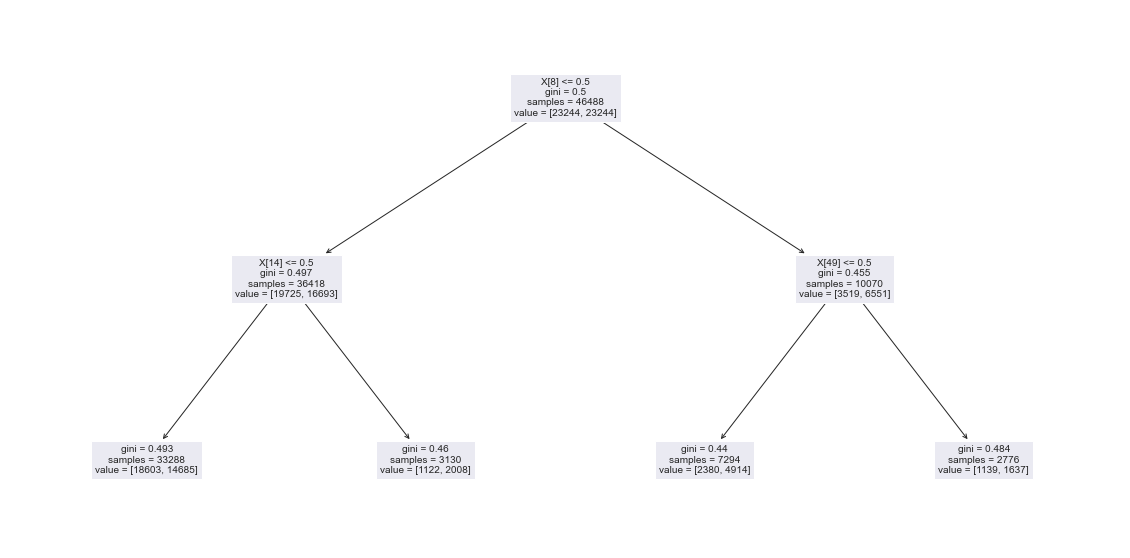

In [16]:
#here i make the desicion tree with the best parameters
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state = 42)
tree_clfFit = tree_clf.fit(x_nm,y_nm)
plt.figure(figsize=(20,10))
tree.plot_tree(tree_clfFit, fontsize=10)

### Evaluation

In [17]:
#here i iimport metrics and accuracy score
from sklearn import metrics
from sklearn.metrics import accuracy_score
#here i give the accuracy score for this model
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5750699075069907

the accuracy is around 58%, this is a bit lower then the other way to undersample so it doesnt look very promissing. to know that for sure we would have to look into the classification report and the cross validation score.

In [18]:
#here i import the classification report
from sklearn.metrics import classification_report
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.55      0.79      0.65      4633
     class 2       0.63      0.36      0.46      4665

    accuracy                           0.58      9298
   macro avg       0.59      0.58      0.55      9298
weighted avg       0.59      0.58      0.55      9298



in comparising with the best of the downsampling with the sample function this one is worse. the difference between the precisions of thed 2 classes is bigger and lower overall. 

In [19]:
#here i import the cross validation score
from sklearn.model_selection import cross_val_score
#here i firstly print the seperate scores and also the mean overall score
print(cross_val_score(tree_clf, x_nm, y_nm, cv=5))
cross_val_score(tree_clf, x_nm, y_nm, cv=5).mean()

[0.28554528 0.58754571 0.57506991 0.58868452 0.59438529]


0.5262461404561727

the cross validation score is also a lot lower then the other downsamping results, so this one is worse and should not be used.

## Random forest part 1

In [20]:
#here i show the result form the gridsearch for the random forest model that i run in the kernel via a python file
pd.read_csv("GridSearchRandomForest5.csv").drop('Unnamed: 0',axis=1)

,Best criterion,Best max_depth,Best n_estimators
0,gini,13,70


In [21]:
#here i import the random forest classifier
from sklearn.ensemble import RandomForestClassifier
#here i used the outcomes from the gridsearch to get the best possible outcome from the random forest model
forest_clf3 = RandomForestClassifier(criterion='gini', max_depth=13, random_state = 42, n_estimators = 70)
forest_clf3.fit(x_nm,y_nm)
forest_clf3

RandomForestClassifier(max_depth=13, n_estimators=70, random_state=42)

### Evaluation

In [22]:
#here i give the accuracy score for this model
y_pred3 = forest_clf3.predict(X_test)
accuracy_score(y_test, y_pred3)

0.6288449128844913

you can see that the accuracy of this on is better then the last one and a bit worse then the best of the other downsampling method. but to know it is overall performs worse i would have to look into the other indicators as well. 

In [23]:
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.63      0.63      0.63      4633
     class 2       0.63      0.63      0.63      4665

    accuracy                           0.63      9298
   macro avg       0.63      0.63      0.63      9298
weighted avg       0.63      0.63      0.63      9298



this classification report looks better then the on of the other method because this os way more ballanced.

In [24]:
#here i print the seperate cross validation scores and also the mean overall score
print(cross_val_score(forest_clf3, x_nm, y_nm, cv=5))
cross_val_score(forest_clf3, x_nm, y_nm, cv=5).mean()

[0.39481609 0.48246935 0.41234674 0.42938582 0.49564376]


0.4429323516794888

After lookiung at the cross validation score i can see that the 63% was pure lucka dn overall its performing way worse.

## Decision trees part 2

In [25]:
#here i undersmaple with the 2nd version of near miss
nm = NearMiss(version=2)
x_nm2, y_nm2 = nm.fit_resample(X, y)
print(Counter(y))
print(Counter(y_nm2))

Counter({0: 53071, 1: 23244})
Counter({0: 23244, 1: 23244})


In [26]:
#here i split the data into train and test data
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_nm2, y_nm2, test_size=0.2, random_state = 42)

In [27]:
#here i look at the information from the new dataset
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76315 entries, 0 to 76314
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    76315 non-null  int64  
 1   Station_Code                  76315 non-null  object 
 2   Station_Name                  76315 non-null  object 
 3   Train_Number                  76315 non-null  int64  
 4   Train_Type                    76315 non-null  object 
 5   Train_Company                 76315 non-null  object 
 6   Train_Destination_Planned     76315 non-null  object 
 7   Train_Destination_Actual      76315 non-null  object 
 8   Train_Departure_Planned       76315 non-null  object 
 9   Train_Departure_Actual        76315 non-null  object 
 10  Train_Delay                   76315 non-null  float64
 11  MaxNumberOfStops              76315 non-null  int64  
 12  weekday                       76315 non-null  int64  
 13  d

In [28]:
#here i do the gridsearch to get the best values for the parameters
parameters = {'criterion':('gini', 'entropy'), 'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
clf_GS2 = GridSearchCV(DecisionTreeClassifier(), parameters)
clf_GS2.fit(x_nm2, y_nm2)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30]})

In [29]:
#here i print the outcomes from the gridsearch
print('Best Criterion:', clf_GS2.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS2.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 2


[Text(0.4, 0.8333333333333334, 'X[0] <= 1.5\ngini = 0.5\nsamples = 46488\nvalue = [23244, 23244]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 7042\nvalue = [0, 7042]'),
 Text(0.6, 0.5, 'X[0] <= 4.5\ngini = 0.484\nsamples = 39446\nvalue = [23244, 16202]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.429\nsamples = 33651\nvalue = [23169, 10482]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.026\nsamples = 5795\nvalue = [75, 5720]')]

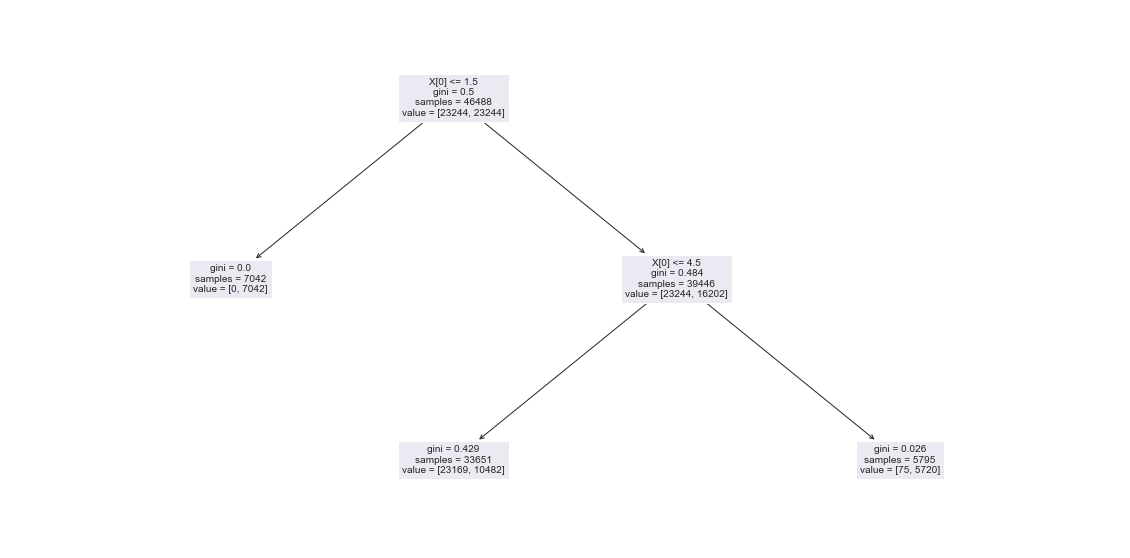

In [30]:
#here i make the desicion tree with the best parameters
tree_clf2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state = 42)
tree_clfFit2 = tree_clf2.fit(x_nm2,y_nm2)
plt.figure(figsize=(20,10))
tree.plot_tree(tree_clfFit2, fontsize=10)

### Evaluation

In [31]:
#here i give the accuracy score for this model
y_pred2 = tree_clf2.predict(X_test2)
accuracy_score(y_test2, y_pred2)

0.7738223273822328

Now the accuracy is way better then the other methods with an accuracy of 77%. hopefully this isnt just because of luck and the random state i choose.

In [32]:
#here i import the classification report
from sklearn.metrics import classification_report
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.69      1.00      0.81      4633
     class 2       0.99      0.55      0.71      4665

    accuracy                           0.77      9298
   macro avg       0.84      0.77      0.76      9298
weighted avg       0.84      0.77      0.76      9298



if you look at the classification report you can see that class 1 it has a 69% precision which means that 69% of the cases it is actually that class (31% are false positives) and the 100% recall means that there are no false negatives, so (nearly) everythign that is in this class is predicted in this class. for the second class it has a 99% precision which is logical as the only other class has a 100% recall. the recall of the seconds class is 55% which is the cause for the 69% precision of the first class. becuase the first class is the no delay and the second class is the delay it basically means that the delays get predicted with 99% precision and 31% of the no delay gets predicted as delay.

In [33]:
#here i import the cross validation score
from sklearn.model_selection import cross_val_score
#here i firstly print the seperate scores and also the mean overall score
print(cross_val_score(tree_clf2, x_nm2, y_nm2, cv=5))
cross_val_score(tree_clf2, x_nm2, y_nm2, cv=5).mean()

[0.73704022 0.87664014 0.79242848 0.74389588 0.71453157]


0.7729072580651691

the overal score is 77% so that means that the earlier 77% is not just pure luck. 77% is good enough to be used in real life, but the question ofcourse is if it is really usefull, becuase most of delays arent that long to begin with.

## Random forest part 2

In [34]:
#here i show the result form the gridsearch for the random forest model that i run in the kernel via a python file
pd.read_csv("GridSearchRandomForest6.csv").drop('Unnamed: 0',axis=1)

,Best criterion,Best max_depth,Best n_estimators
0,entropy,2,130


In [35]:
#here i import the random forest classifier
from sklearn.ensemble import RandomForestClassifier
#here i used the outcomes from the gridsearch to get the best possible outcome from the random forest model
forest_clf2 = RandomForestClassifier(criterion='entropy', max_depth=2, random_state = 42, n_estimators = 130)
forest_clf2.fit(x_nm2,y_nm2)
forest_clf2

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=130,
                       random_state=42)

### Evaluation

In [36]:
#here i give the accuracy score for this model
y_pred3 = forest_clf2.predict(X_test2)
accuracy_score(y_test2, y_pred3)

0.7738223273822328

the accuracy score of the random forest is also 77% lets check the classificantion report to see which one is actually better.

In [37]:
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test2, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.69      1.00      0.81      4633
     class 2       0.99      0.55      0.71      4665

    accuracy                           0.77      9298
   macro avg       0.84      0.77      0.76      9298
weighted avg       0.84      0.77      0.76      9298



this classification report is exactly the same as the decision tree one.

In [38]:
#here i print the seperate cross validation scores and also the mean overall score
print(cross_val_score(forest_clf2, x_nm2, y_nm2, cv=5))
cross_val_score(forest_clf2, x_nm2, y_nm2, cv=5).mean()

[0.68627662 0.86706819 0.79242848 0.74389588 0.67172206]


0.7522782451697413

The cross validation is 2% worse so the decision tree is better.

## Decision trees part 3

In [39]:
#here i do the 3rd version fo near miss
nm3 = NearMiss(version=3)
x_nm3, y_nm3 = nm3.fit_resample(X, y)
print(Counter(y))
print(Counter(y_nm3))

Counter({0: 53071, 1: 23244})
Counter({1: 23244, 0: 1949})


based on the amount of the groups i can already say its going to predict every as delay since it made the no delay less then 10% the size of the delay which will give an accuracy in the 90%.

In [40]:
#here i split the data into test and train data.
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_nm3, y_nm3, test_size=0.2, random_state = 42)

In [41]:
#here i look at the information from the new dataset
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76315 entries, 0 to 76314
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    76315 non-null  int64  
 1   Station_Code                  76315 non-null  object 
 2   Station_Name                  76315 non-null  object 
 3   Train_Number                  76315 non-null  int64  
 4   Train_Type                    76315 non-null  object 
 5   Train_Company                 76315 non-null  object 
 6   Train_Destination_Planned     76315 non-null  object 
 7   Train_Destination_Actual      76315 non-null  object 
 8   Train_Departure_Planned       76315 non-null  object 
 9   Train_Departure_Actual        76315 non-null  object 
 10  Train_Delay                   76315 non-null  float64
 11  MaxNumberOfStops              76315 non-null  int64  
 12  weekday                       76315 non-null  int64  
 13  d

In [42]:
#here i do the gridsearch to get the best values for the parameters
parameters = {'criterion':('gini', 'entropy'), 'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
clf_GS3 = GridSearchCV(DecisionTreeClassifier(), parameters)
clf_GS3.fit(x_nm3, y_nm3)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30]})

In [43]:
#here i print the outcomes from the gridsearch
print('Best Criterion:', clf_GS3.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS3.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 2


[Text(0.5, 0.8333333333333334, 'X[50] <= 0.5\ngini = 0.143\nsamples = 25193\nvalue = [1949, 23244]'),
 Text(0.25, 0.5, 'X[8] <= 0.5\ngini = 0.128\nsamples = 24131\nvalue = [1653, 22478]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.163\nsamples = 17568\nvalue = [1569, 15999]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.025\nsamples = 6563\nvalue = [84, 6479]'),
 Text(0.75, 0.5, 'X[54] <= 0.5\ngini = 0.402\nsamples = 1062\nvalue = [296, 766]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.221\nsamples = 190\nvalue = [24, 166]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.429\nsamples = 872\nvalue = [272, 600]')]

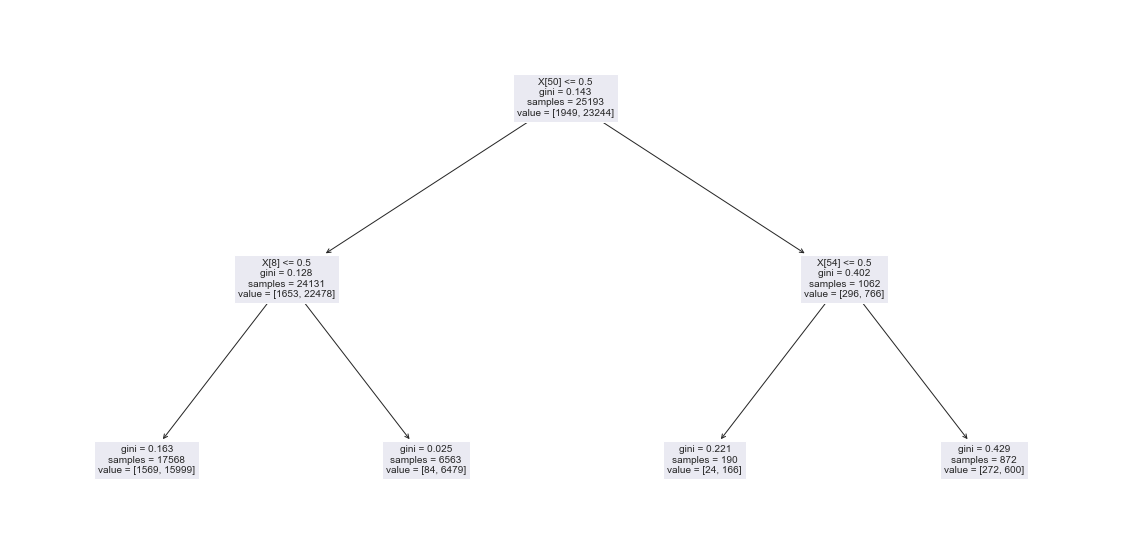

In [44]:
#here i make the desicion tree with the best parameters
tree_clf3 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state = 42)
tree_clfFit3 = tree_clf3.fit(x_nm3,y_nm3)
plt.figure(figsize=(20,10))
tree.plot_tree(tree_clfFit3, fontsize=10)

### Evaluation

In [45]:
#here i give the accuracy score for this model
y_pred3 = tree_clf3.predict(X_test3)
accuracy_score(y_test3, y_pred3)

0.9267711847588808

Just like my prediction the percentage is in the 90%. lets see with the classification report if it indeed predicts everythign to have a delay.

In [46]:
#here i import warnings to ignore the warnings
import warnings
warnings.filterwarnings("ignore")
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test3, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.00      0.00      0.00       369
     class 2       0.93      1.00      0.96      4670

    accuracy                           0.93      5039
   macro avg       0.46      0.50      0.48      5039
weighted avg       0.86      0.93      0.89      5039



Just like i thought it predicts everything as delay.

In [47]:
#here i import the cross validation score
from sklearn.model_selection import cross_val_score
#here i firstly print the seperate scores and also the mean overall score
print(cross_val_score(tree_clf3, x_nm3, y_nm3, cv=5))
cross_val_score(tree_clf3, x_nm3, y_nm3, cv=5).mean()

[0.92260369 0.92260369 0.92260369 0.92258833 0.92278682]


0.9226372444988635

here i can also see that the cross validation is the aroudn the same percentage because it says everything is a delay.

## Conclusion
we got the best result with decision trees part 2. there we used miss near version 2. it got a 77% accuracy score and the delays it predicts are actual delays. it does however put some delays as no delays.